# House-Price-Prediction

목차:

**[I. 데이터 불러오기 및 확인](#one)**

- [a. 데이터 불러오기](#one-a)

**[II. EDA & FE](#two)**

- [a. Data Processing](#two-a)
- [b. concat](#two-b)
- [c. 타겟변수 확인](#two-c)
- [d. 결측치 확인 및 처리](#two-d)
- [e. 순서형과 명목형 데이터 분리](#two-e)
- [f. f.파생 변수 생성](#two-f)
- [g. 수치형 변수 확인](#two-g)
- [h. 범주형 변수 확인](#two-h)
- [i. box-cox 변환](#two-i)
- [j. 중요 변수 확인](#two-j)


    
**[III. 모델링](#three)**

- [a. 단순선형 회귀 & 통계치확인](#three-a)
- [b. RobustScaler](#three-b)
- [c. KFold](#three-c)
- [d. 파라미터 튜닝 & GridSearchCV](#three-d)

**[IV. 예측](#four)**

- [a. 앙상블](#four-a)
- [b. voting](#four-b)
- [c. stacking](#four-c)
- [c. blending](#four-c)

## I. 데이터 불러오기 및 확인 <a id="one"></a>

1. 변수 | 설명
------- | ------- 
**SalePrice** | 집값 
**ID** |  집을 구분하는 번호
**date** | 집을 구매한 날짜
**price** | 집의 가격
**OverallQual** | 전체 재료 및 마지막 품질
**GrLivArea** | 생활 면적 평방 피트
**GarageCars** | 차고
**1stFlrSF** | 1층 평방 피트
**YearBuilt** | 최초 공사 일
**YearRemodAdd** | 리모델한 날
**Fireplaces** | 벽난로 수
**OpenPorchSF** | 평방 피트 단위의 현관 면적
**MasVnrArea** | 제곱 피트의 벽돌 베니어 면적
**LotFrontage** | 건물에 연결된 거리의 선형 피트
**CentralAir** | 중앙 에어컨
**KitchenQual** | 주방 품질
**HeatingQC** | 난방 품질 및 상태
**ExterQual** | 외부 재료 품질
**BsmtQual** | 지하실의 높이

**데이터는 일부만을 설명하였습니다**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import Image

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [5]:
test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


## II. EDA & FE <a id="two"></a> 

### a.Data Processing <a id="two-a"></a>

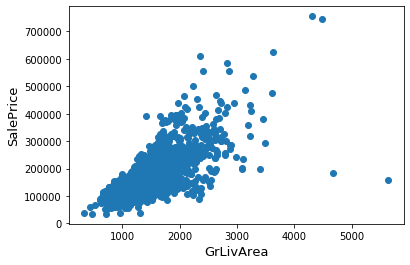

In [6]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [7]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

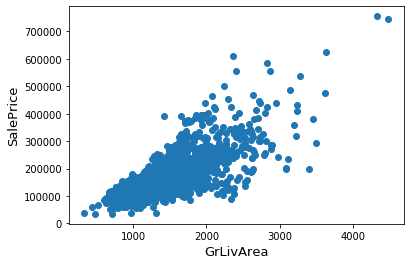

In [8]:
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

> 산점도 확인결과 이상치를 제거해 주었습니다

In [9]:
cor = train.corr()
cor_fe = cor.index[abs(cor['SalePrice']) >= 0.3]
cor_fe

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

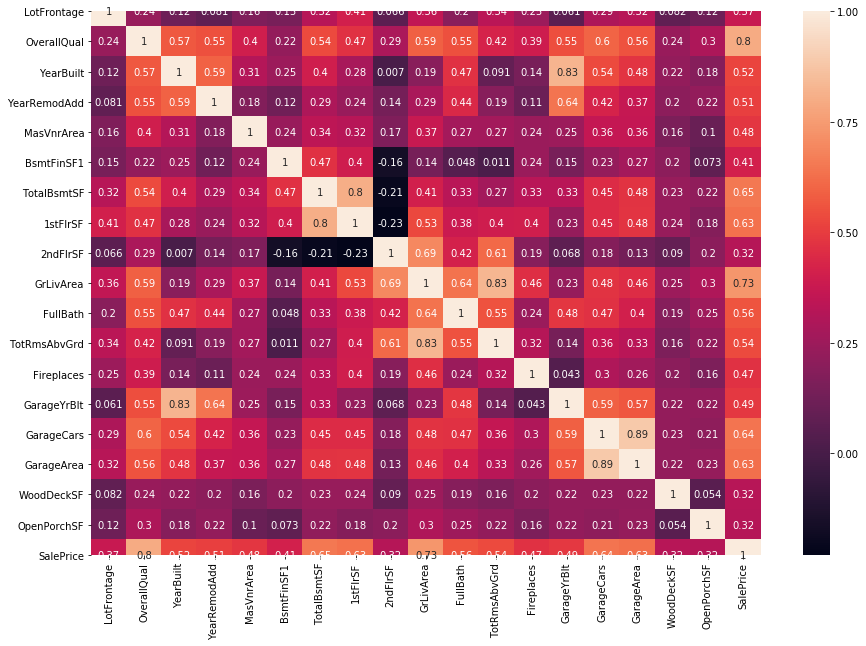

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(train[cor_fe].corr(),annot=True)

>상관관계를 보기 위해서 히트맵을 그려줬다. corr()함수를 통해서 상관관계가 0.3 이상인 변수들만 히트맵으로 출력하였다. 옅은 부분이 상관관계가 높은것으로 두 변수간에 상관관계가 너무 강하면 다중 공선성 상황이 나타날 수도 있다.타겟 변수인 Saleprice와의 상관관계도 눈 여겨 보아야 할 것이다.

### b.concat <a id="two-b"></a>

In [11]:
fe_name = list(test)
df_train = train[fe_name]
df = pd.concat((df_train,test))

In [12]:
print(train.shape, test.shape, df.shape)

(1458, 81) (1459, 80) (2917, 80)


### c.타겟변수 확인 <a id="two-c"></a>

In [13]:
from scipy import stats
from scipy.stats import norm

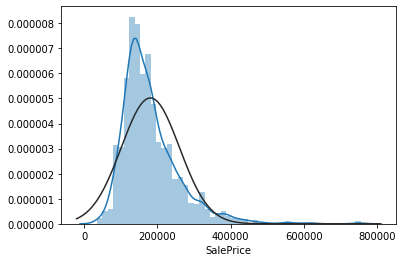

In [14]:
sns.distplot(train['SalePrice'],fit = norm)

((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74213.25959976624, 180932.91906721535, 0.9320154492892367))

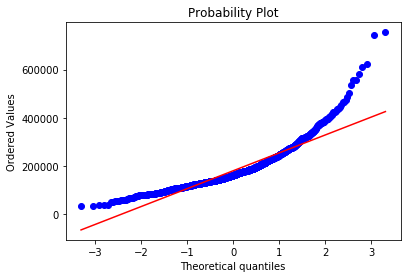

In [15]:
stats.probplot(train['SalePrice'], plot=plt)

>타겟 변수인 SalePrice의 왜도 확인 결과 왼쪽으로 치우쳐 있었으며 정규성을 띄지 않아 보였다. qq 플롯을 그려보니 정규성을 띄지 않아서 로그 변환을 하였다. 통계 용어로 멱변환이라기도 하고 박스칵스 변환으로 람다를 사용하지 않고 로그를 취하였다. 박스-칵스 변환의 주된 용도는 데이터를 정규분포에 가깝게 만들거나 데이터 분산을 안정화 하는 것으로 데이터 전처리에 유요하게 쓸 수 있다.



![nn](img.png)

In [ ]:
$$ 2rarcsin\sqrt{\sin^2(\frac{φ_2 -φ_1}{2}) + cos(φ_1)cos(φ_2)sin^2(\frac{λ_2 -λ_1}{2})} $$

$$ x > 0 에 대해 g(x) := {{\frac{x^λ-1}{λ}}, λ = 0이 아닐때  /
logx , λ =0} $$

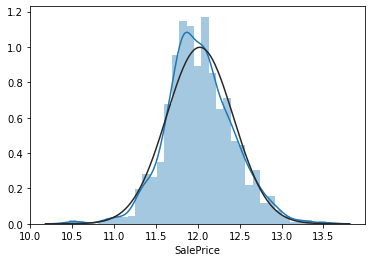

In [16]:
train['SalePrice'] = np.log1p(train["SalePrice"])
sns.distplot(train['SalePrice'],fit=norm)

((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([10.46027076, 10.47197813, 10.54273278, ..., 13.34550853,
         13.52114084, 13.53447435])),
 (0.3985294832980731, 12.024015155682548, 0.9953918721417083))

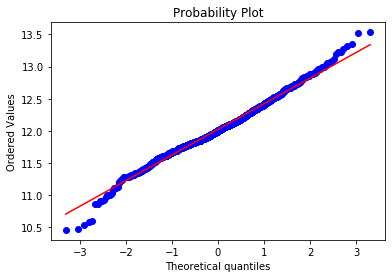

In [17]:
stats.probplot(train['SalePrice'], plot=plt)

> 박스칵스 변환 결과 데이터가 정규성을 잘 따르고 있는 것을 볼 수 있다.

In [18]:
target = train['SalePrice']

### d.결측치 확인 및 처리 <a id="two-d"></a>

In [19]:
null_df = (df.isna().sum() / len(df)) *100
null_df = null_df.drop(null_df[null_df == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :null_df})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageFinish,5.450806
GarageYrBlt,5.450806
GarageQual,5.450806
GarageCond,5.450806


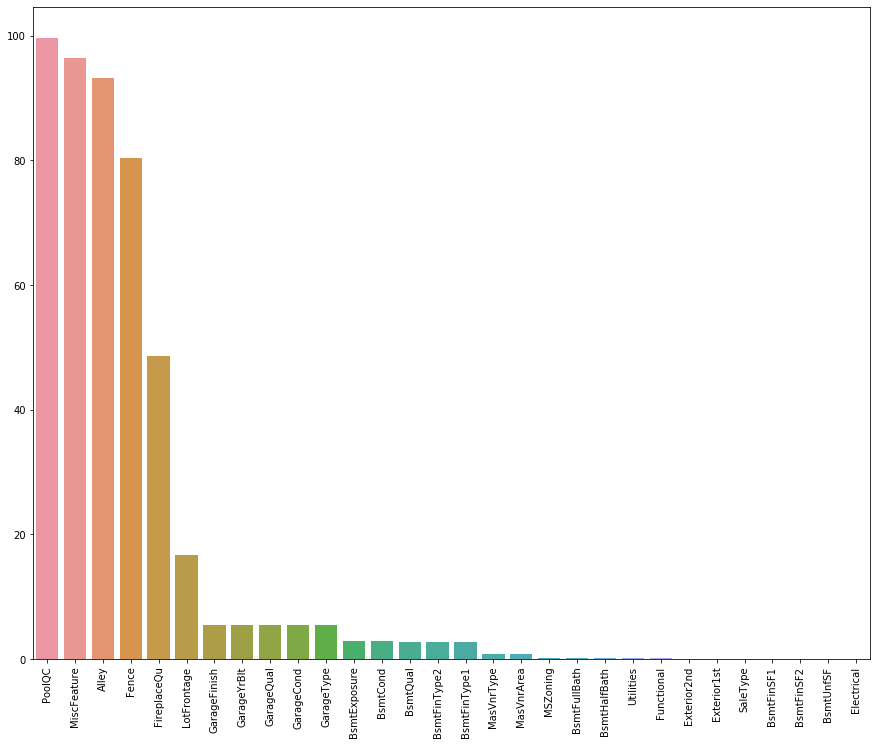

In [20]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=null_df.index, y=null_df)

> 결측치를 순서대로 정렬한뒤 xticks 그래프를 통해서 시각화 시켜주었습니다. 

- **PoolQC** : 데이터의 NA는 풀이 없음을 의미합니다. 결측값의 비율이 99%로 매우 높고 대부분 주택에는 수영장이 없음을 감안할때 의미있는 변수입니다

In [21]:
df["PoolQC"] = df["PoolQC"].fillna("None")

- **MiscFeature** : data description에 의하면 NA는 "no misc feature"로 기타기능 없음을 의미합니다.

In [22]:
df["MiscFeature"] = df["MiscFeature"].fillna("None")

- **Alley** : data description에 의하면 NA는 "no alley access"로 골목 접근 금지를 의미합니다.

In [23]:
df["Alley"] = df["Alley"].fillna("None")

- **Fence** : data description에 의하면NA는 "no fence"로 울타리가 없는 것을 의미합니다.

In [24]:
df["Fence"] = df["Fence"].fillna("None")

- **FireplaceQu** : data description에 의하면NA는 "no fireplace"로 난로가 없는 것을 의미합니다

In [25]:
df["FireplaceQu"] = df["FireplaceQu"].fillna("None")

- **LotFrontage** : 주택건물에 연결된 각 거리의 면적이 주변의 다른 주택과 비슷한 지역일 가능성이 높기 때문에 이웃의 LotFrontage의 중앙값으로 결측치를 채웁니다

In [26]:
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

- **GarageType, GarageFinish, GarageQual and GarageCond** : 누락된 데이터를 None값으로 대체합니다

In [27]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[col] = df[col].fillna('None')

- **GarageYrBlt, GarageArea and GarageCars** : 결측치를 0으로 대체합니다 (차고가 없는 것은 차고에 차가 없는 것을 의미하기 때문입니다.)

In [28]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df[col] = df[col].fillna(0)

- **BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath** :지하실이 없으면 결측값이 0 일 가능성이 높기 때문에 결측치를 0으로 대체합니다

In [29]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df[col] = df[col].fillna(0)

- **BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2** :이러한 모든 범주 형 지하실 관련 기능에 대해 NaN은 지하실이 없음을 의미합니다.

In [30]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[col] = df[col].fillna('None')

- **MasVnrArea and MasVnrType** :NA는 아마도이 집들에 대한 고정 베니어가 없다는 것을 의미합니다. Area은 0을, Type은 없음을 채울 수 있습니다.

In [31]:
df["MasVnrType"] = df["MasVnrType"].fillna("None")
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)

- **MSZoning (The general zoning classification)** : 'RL'이 가장 일반적인 값입니다. 따라서 'RL'로 결 측값을 채울 수 있습니다

In [32]:
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])

- **Utilities** : 이 범주 기능의 경우 하나의 "NoSeWa"및 2 NA를 제외한 모든 데이터는 "AllPub"입니다. 'NoSewa'가있는 집이 훈련 세트에 있으므로이 기능은 예측 모델링에 도움이되지 않습니다. 그러므로 변수를 제거해줍니다

In [33]:
df = df.drop(['Utilities'], axis=1)

- **Functional** : data description에 의하면 NA는 typical을 의미합니다

In [34]:
df["Functional"] = df["Functional"].fillna("Typ")

- **Electrical** : 하나의 NA 값이 있습니다. 이 기능은 대부분 'SBrkr'을 가지므로 결측값으로 설정할 수 있습니다.

In [35]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

- **KitchenQual**: 전기와 동일한 하나의 NA 값만으로 KitchenQual의 결 측값에 'TA'(가장 빈번)를 설정합니다.

In [36]:
df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])

- **Exterior1st and Exterior2nd** : 두변수 모두 Exterior 1 & 2 하나의 결측값만 가집니다. 따라서 가장 일반적인 문자로 대체할 것입니다.

In [37]:
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])

- **SaleType** : 가장 빈번한 데이터인 WD로 결측치를 대체합니다

In [38]:
df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])

- **MSSubClass** : Na는 건물 등급 없음을 의미합니다. 결측값을 None으로 대체 할 수 있습니다

In [39]:
df['MSSubClass'] = df['MSSubClass'].fillna("None")

In [40]:
null_df = (df.isna().sum() / len(df)) *100
null_df = null_df.drop(null_df[null_df == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :null_df})
missing_data.head(20)

,Missing Ratio


> 결측치 확인결과 결측값이 없는것으로 판단되었습니다

In [41]:
#MSSubClass
df['MSSubClass'] = df['MSSubClass'].apply(str)
#OverallCond
df['OverallCond'] = df['OverallCond'].astype(str)
#YrSold,MoSold
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

> 건물의 클래스인 MSSubClass,전반적인 조건 등급인 OverallCond,연 월의 변수인 YrSold와 MoSold 피처에 대해서 int가 아닌 범주형으로 astype 함수를 이용하여 범주화 시켜줍니다

### e.순서형과 명목형 데이터 분리 <a id="two-e"></a>

In [42]:
df_obj = df.select_dtypes(include='object')
df_obj.head(3)

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,TA,TA,Y,None,None,None,2,2008,WD,Normal
1,20,RL,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,TA,TA,Y,None,None,None,5,2007,WD,Normal
2,60,RL,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,TA,TA,Y,None,None,None,9,2008,WD,Normal


In [43]:
li_obj = list(df_obj.columns)

In [44]:
df_num = df.select_dtypes(exclude = 'object')
df_num.head(3)

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,1,65.0,8450,7,2003,2003,196.0,706.0,0.0,150.0,...,2003.0,2.0,548.0,0,61,0,0,0,0,0
1,2,80.0,9600,6,1976,1976,0.0,978.0,0.0,284.0,...,1976.0,2.0,460.0,298,0,0,0,0,0,0
2,3,68.0,11250,7,2001,2002,162.0,486.0,0.0,434.0,...,2001.0,2.0,608.0,0,42,0,0,0,0,0


In [45]:
li_num = list(df_num.columns)

>데이터 처리를 하기 위해서 순서형과 명목형 데이터를 분리 하였습니다.각 변수들의 결측치 처리를 합니다.

In [46]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for c in cols:
    lb = LabelEncoder() 
    lb.fit(list(df[c].values)) 
    df[c] = lb.transform(list(df[c].values))

> 나중에 모델링을 하기 위해서 범주형 변수들을 라벨인코딩 해주었습니다.

### f.파생 변수 생성 <a id="two-f"></a>

In [47]:
df['TotalSF'] = (df['TotalBsmtSF'] 
                       + df['1stFlrSF'] 
                       + df['2ndFlrSF'])

df['YrBltAndRemod'] = df['YearBuilt'] + df['YearRemodAdd']

df['Total_sqr_footage'] = (df['BsmtFinSF1'] 
                                 + df['BsmtFinSF2'] 
                                 + df['1stFlrSF'] 
                                 + df['2ndFlrSF']
                                )
                                 

df['Total_Bathrooms'] = (df['FullBath'] 
                               + (0.5 * df['HalfBath']) 
                               + df['BsmtFullBath'] 
                               + (0.5 * df['BsmtHalfBath'])
                              )
                               

df['Total_porch_sf'] = (df['OpenPorchSF'] 
                              + df['3SsnPorch'] 
                              + df['EnclosedPorch'] 
                              + df['ScreenPorch'] 
                              + df['WoodDeckSF']
                             )

> 피처엔지니어링을 통해서 각 피처들의 합으로 Total 피처를 생성하였다

In [48]:
df['haspool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df['has2ndfloor'] = df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df['hasgarage'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df['hasbsmt'] = df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df['hasfireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

>haspool,has2ndfloor,hasgarage,hasbsmt,hasfireplace 피처를 생성하였는데 각 피처가 풀장을 가지고 있다 없다를 기준으로 apply 함수를 적용시켜서 생성하였다

### g.수치형 변수 확인 <a id="two-g"></a> 

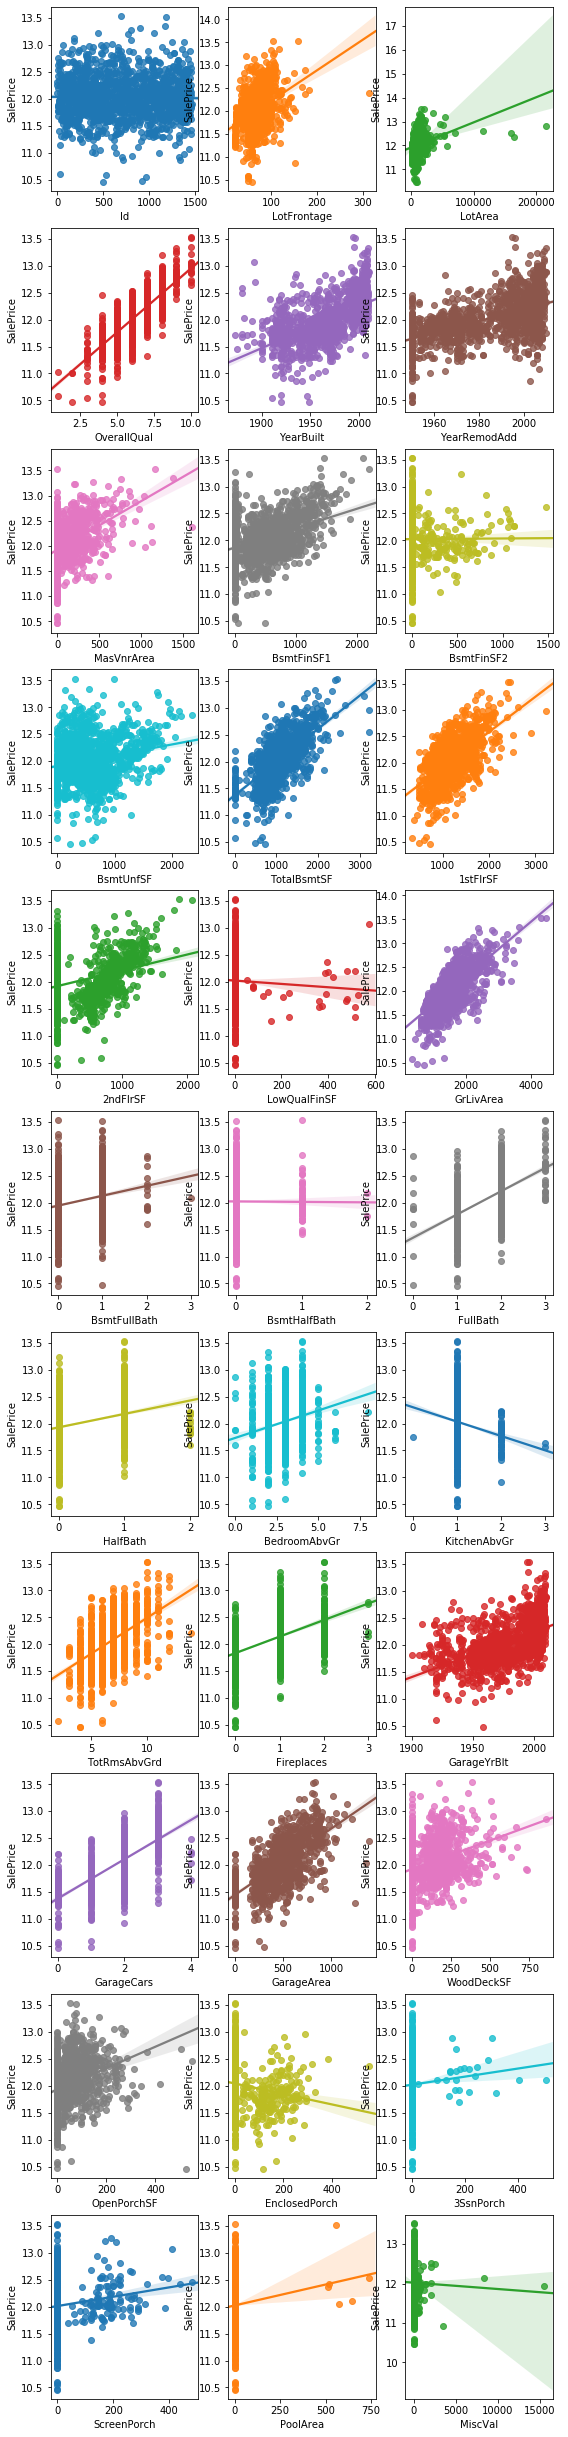

In [49]:
row = 11
col = 3 

fig, axs = plt.subplots(row,col, figsize = (col*3,row*4))

for r in range(0,row):
    for c in range(0,col):
        i = r*col + c
        if i < len(li_num):
            sns.regplot(train[li_num[i]],target , ax = axs[r][c])

In [50]:
stats.pearsonr(train[li_num[11]],target)

(0.6205000189170755, 6.572494159280828e-156)

In [51]:
strong_num = ['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF',
             'FullBath','TotRmsAbvGrd','GarageYrBlt','GarageCars','GrLivArea']

>regplot을 그려보아서 선형선이 강한 변수들을 따로 구분하였으며 시각적으로 애매한 부분들은 stats함수의 피어슨상관계수를 보고 상관성이 강한 변수들을 따로 구분하였습니다.

### h.범주형 변수 확인 <a id="two-h"></a>

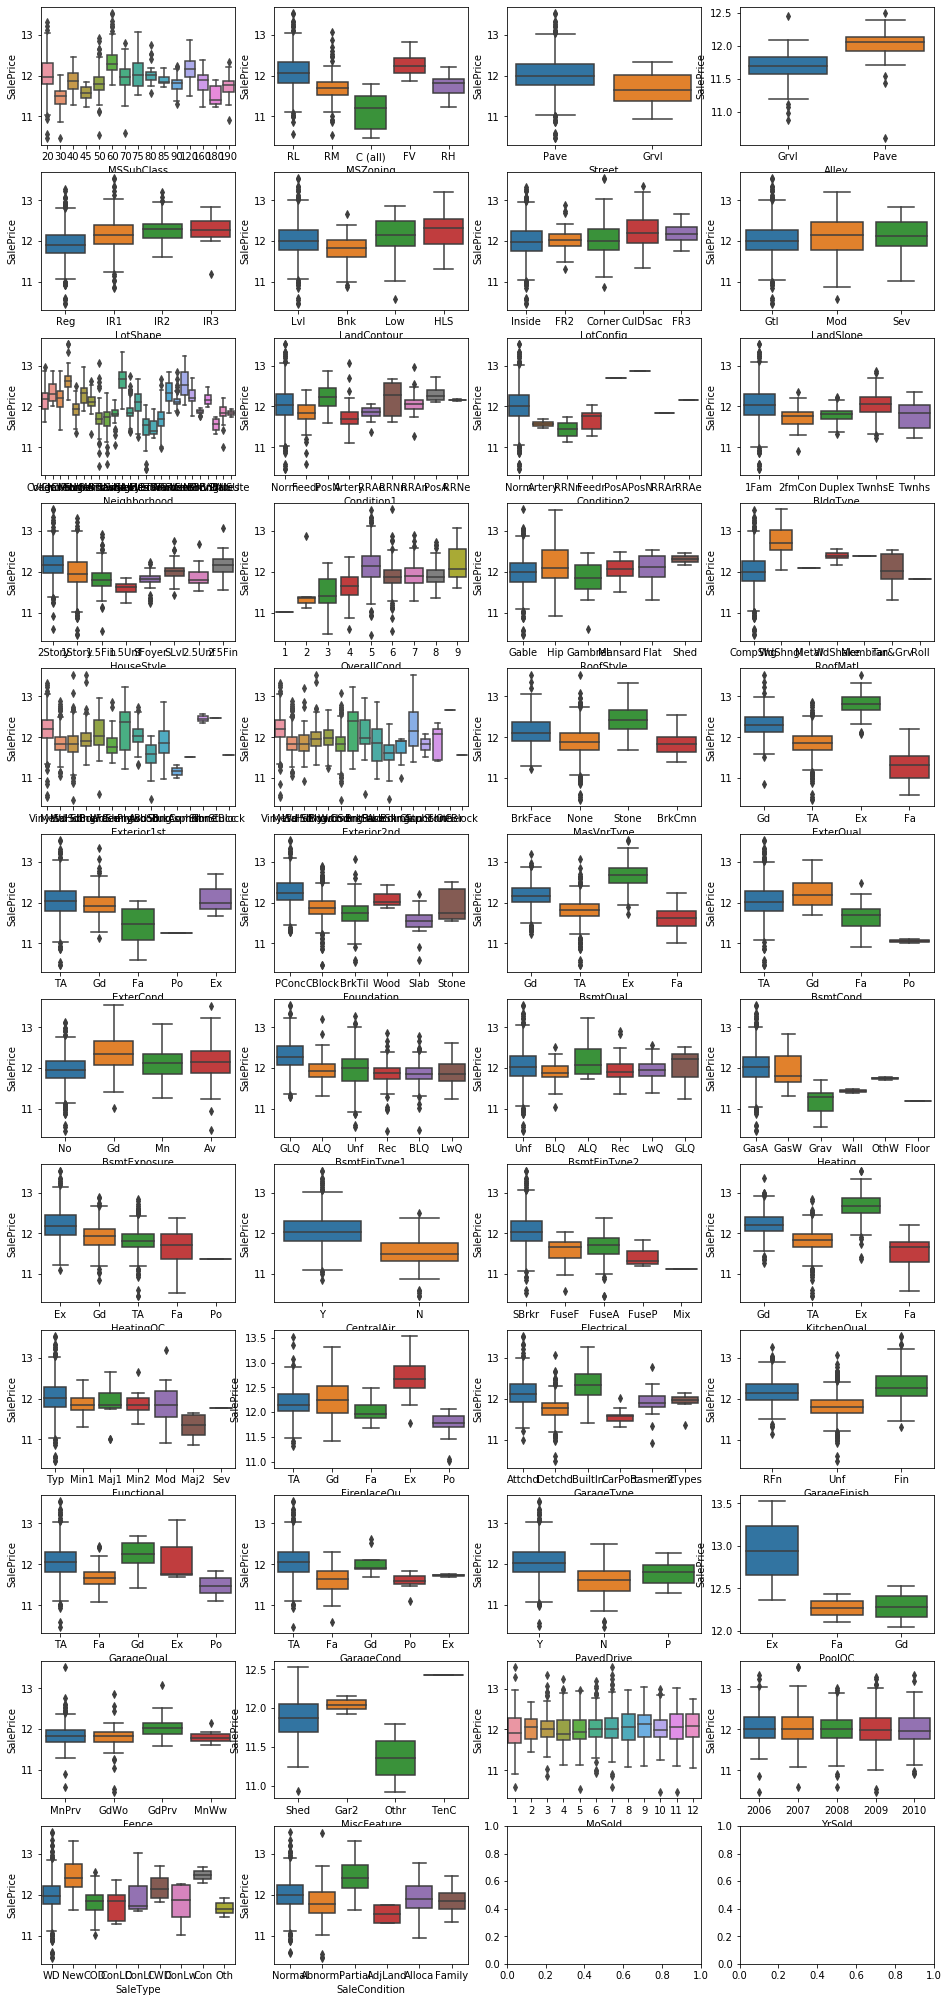

In [52]:
row = 12
col = 4 

fig, axs = plt.subplots(row,col, figsize = (col*4,row*3))

for r in range(0,row):
    for c in range(0,col):
        i = r*col + c
        if i < len(li_obj):
            sns.boxplot(train[li_obj[i]],target , ax = axs[r][c])

In [53]:
strong_obj = [ 'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 
                'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']

>범주형 변수들 경우 boxplot을 고려보아  비교를 하였으며 타겟변수인 SalePrice에 영향을 많이 끼치는 변수들과  약한 변수들을 구분해 주었습니다.

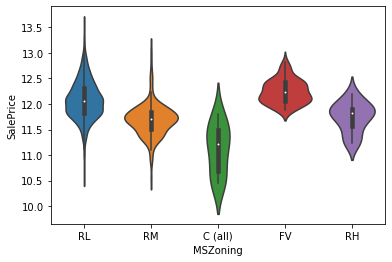

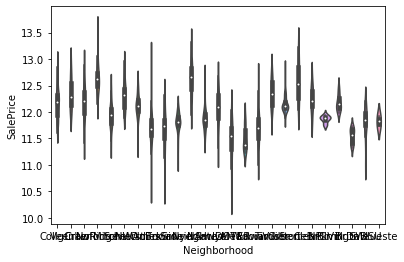

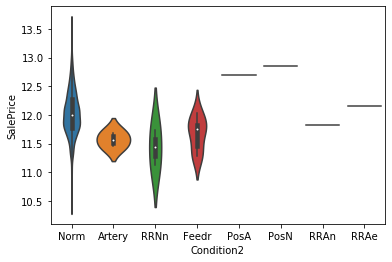

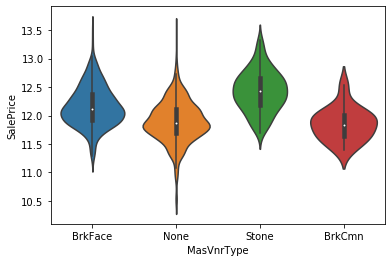

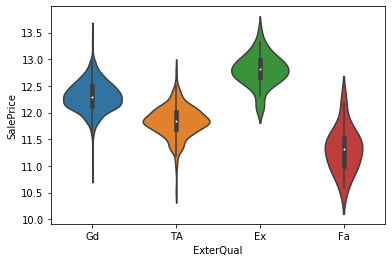

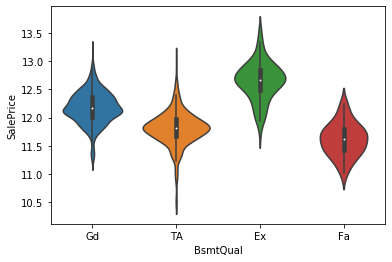

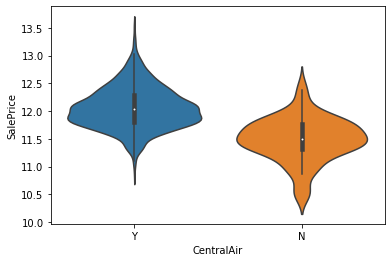

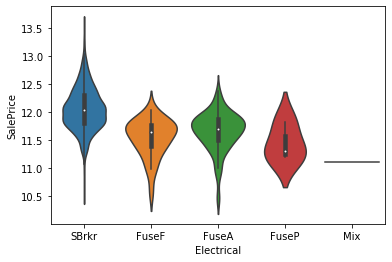

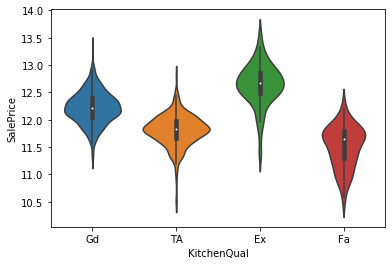

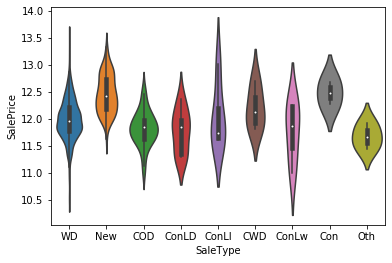

In [54]:
for li in strong_obj:
    sns.violinplot(x= li, y = target, data=train)
    plt.show()

> Boxplot으로 유의하다고 판단되는 변수들을 채택하였고 각 범주들과 SalePrice의 관계를 살펴보기 위해서 violinplot을 통해서 살펴 보았습니다

### i.box-cox 변환  <a id="two-i"></a>

In [55]:
numeric_features = df.dtypes[df.dtypes != "object"].index

In [56]:
from scipy.stats import skew 
skewness = df[numeric_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

In [57]:
high_skewness = skewness[abs(skewness) > 0.75]
skew_feat = high_skewness.index

In [58]:
print(high_skewness)
print(skew_feat)

MiscVal              21.939672
PoolArea             17.688664
haspool              15.494756
LotArea              13.109495
LowQualFinSF         12.084539
3SsnPorch            11.372080
LandSlope             4.973254
KitchenAbvGr          4.300550
BsmtFinSF2            4.144503
EnclosedPorch         4.002344
ScreenPorch           3.945101
BsmtHalfBath          3.929996
MasVnrArea            2.621719
OpenPorchSF           2.529358
WoodDeckSF            1.844792
Total_porch_sf        1.379521
1stFlrSF              1.257286
Total_sqr_footage     1.253666
LotFrontage           1.103039
GrLivArea             1.068750
TotalSF               1.009157
BsmtFinSF1            0.980645
BsmtUnfSF             0.919688
2ndFlrSF              0.861556
BsmtExposure         -1.117321
KitchenQual          -1.449814
ExterQual            -1.800062
Fence                -1.992649
ExterCond            -2.496489
BsmtCond             -2.861271
PavedDrive           -2.977741
BsmtFinType2         -3.042979
GarageQu

> 변수들의 왜도를 파악하기 위해서 skew 함수를 사용합니다. 변수들중 절대값이 0.75 이상인 변수들만 따로 채택한 다음에 로그변환을 취하여 줍니다.

In [59]:
df[['MiscVal', 'PoolArea', 'haspool', 'LotArea', 'LowQualFinSF',
       '3SsnPorch', 'LandSlope', 'KitchenAbvGr', 'BsmtFinSF2', 'EnclosedPorch',
       'ScreenPorch', 'BsmtHalfBath', 'MasVnrArea', 'OpenPorchSF',
       'WoodDeckSF', 'Total_porch_sf', '1stFlrSF', 'Total_sqr_footage',
       'LotFrontage', 'GrLivArea', 'TotalSF', 'BsmtFinSF1', 'BsmtUnfSF',
       '2ndFlrSF', 'BsmtExposure', 'KitchenQual', 'ExterQual', 'Fence',
       'ExterCond', 'BsmtCond', 'PavedDrive', 'BsmtFinType2', 'GarageQual',
       'CentralAir', 'GarageCond', 'GarageYrBlt', 'hasgarage', 'Functional',
       'hasbsmt', 'Street', 'PoolQC']].head(3)

,MiscVal,PoolArea,haspool,LotArea,LowQualFinSF,3SsnPorch,LandSlope,KitchenAbvGr,BsmtFinSF2,EnclosedPorch,...,BsmtFinType2,GarageQual,CentralAir,GarageCond,GarageYrBlt,hasgarage,Functional,hasbsmt,Street,PoolQC
0,0,0,0,8450,0,0,0,1,0.0,0,...,6,5,1,5,2003.0,1,6,1,1,3
1,0,0,0,9600,0,0,0,1,0.0,0,...,6,5,1,5,1976.0,1,6,1,1,3
2,0,0,0,11250,0,0,0,1,0.0,0,...,6,5,1,5,2001.0,1,6,1,1,3


In [60]:
from scipy.special import boxcox1p
lam = 0.15
for feat in skew_feat:
    df[feat] = boxcox1p(df[feat], lam)

> 박스칵스 변환뒤에 데이터를 살펴봅니다

In [61]:
df[['MiscVal', 'PoolArea', 'haspool', 'LotArea', 'LowQualFinSF',
       '3SsnPorch', 'LandSlope', 'KitchenAbvGr', 'BsmtFinSF2', 'EnclosedPorch',
       'ScreenPorch', 'BsmtHalfBath', 'MasVnrArea', 'OpenPorchSF',
       'WoodDeckSF', 'Total_porch_sf', '1stFlrSF', 'Total_sqr_footage',
       'LotFrontage', 'GrLivArea', 'TotalSF', 'BsmtFinSF1', 'BsmtUnfSF',
       '2ndFlrSF', 'BsmtExposure', 'KitchenQual', 'ExterQual', 'Fence',
       'ExterCond', 'BsmtCond', 'PavedDrive', 'BsmtFinType2', 'GarageQual',
       'CentralAir', 'GarageCond', 'GarageYrBlt', 'hasgarage', 'Functional',
       'hasbsmt', 'Street', 'PoolQC']].head(3)

,MiscVal,PoolArea,haspool,LotArea,LowQualFinSF,3SsnPorch,LandSlope,KitchenAbvGr,BsmtFinSF2,EnclosedPorch,...,BsmtFinType2,GarageQual,CentralAir,GarageCond,GarageYrBlt,hasgarage,Functional,hasbsmt,Street,PoolQC
0,0.0,0.0,0.0,19.212182,0.0,0.0,0.0,0.730463,0.0,0.0,...,2.259674,2.055642,0.730463,2.055642,14.187527,0.730463,2.259674,0.730463,0.730463,1.540963
1,0.0,0.0,0.0,19.712205,0.0,0.0,0.0,0.730463,0.0,0.0,...,2.259674,2.055642,0.730463,2.055642,14.145138,0.730463,2.259674,0.730463,0.730463,1.540963
2,0.0,0.0,0.0,20.347241,0.0,0.0,0.0,0.730463,0.0,0.0,...,2.259674,2.055642,0.730463,2.055642,14.184404,0.730463,2.259674,0.730463,0.730463,1.540963


In [62]:
df = pd.get_dummies(df)
print(df.shape)

(2917, 230)


> 라벨인코딩을 하지 않는 변수들에 대해서 모델링 처리를 하기 위해 더미변수를 만들어 주었습니다.

### j.중요 변수 확인 <a id="two-j"></a>

In [63]:
new_train = df[:train.shape[0]]
new_test = df[train.shape[0]:]

In [64]:
new_train = pd.concat([new_train,target], axis=1, sort=False)

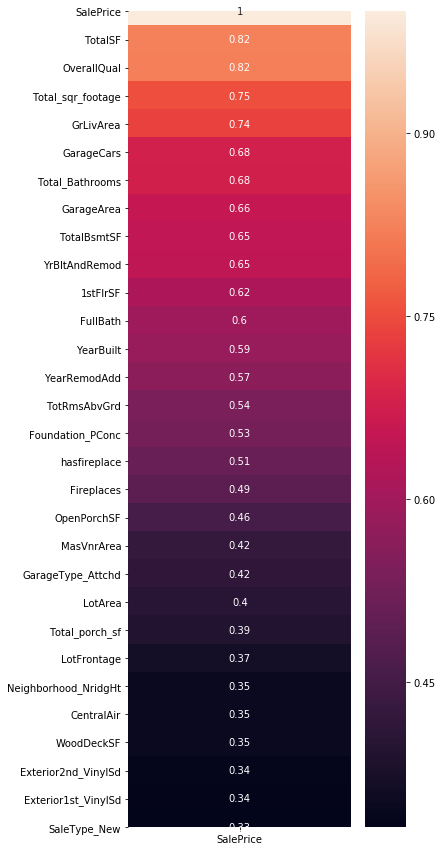

In [65]:
corr_new_train = new_train.corr()
plt.figure(figsize=(5,15))
sns.heatmap(corr_new_train[['SalePrice']].sort_values(by=['SalePrice'],
                                ascending=False).head(30),annot=True)

In [66]:
col_corr_dict = corr_new_train['SalePrice'].sort_values(ascending=False).to_dict()

In [67]:
best_columns=[]
for key,value in col_corr_dict.items():
    if ((value>=0.33) & (value<0.9)) | (value<=-0.325):
        best_columns.append(key)
print(len(best_columns))

38


> 상관성이 큰 변수들을 38개 찾아주었습니다

In [68]:
new_train = new_train.drop(['SalePrice'], axis=1)
new_train = new_train.drop(['Id'], axis=1)
new_test = new_test.drop(['Id'], axis=1)

> 모델링 과정에서 필요없는 변수인 Id와 타겟변수를 드롭해주었습니다

In [69]:
final_train = new_train[best_columns]
final_test = new_test[best_columns]
final_num = list(final_train.columns)

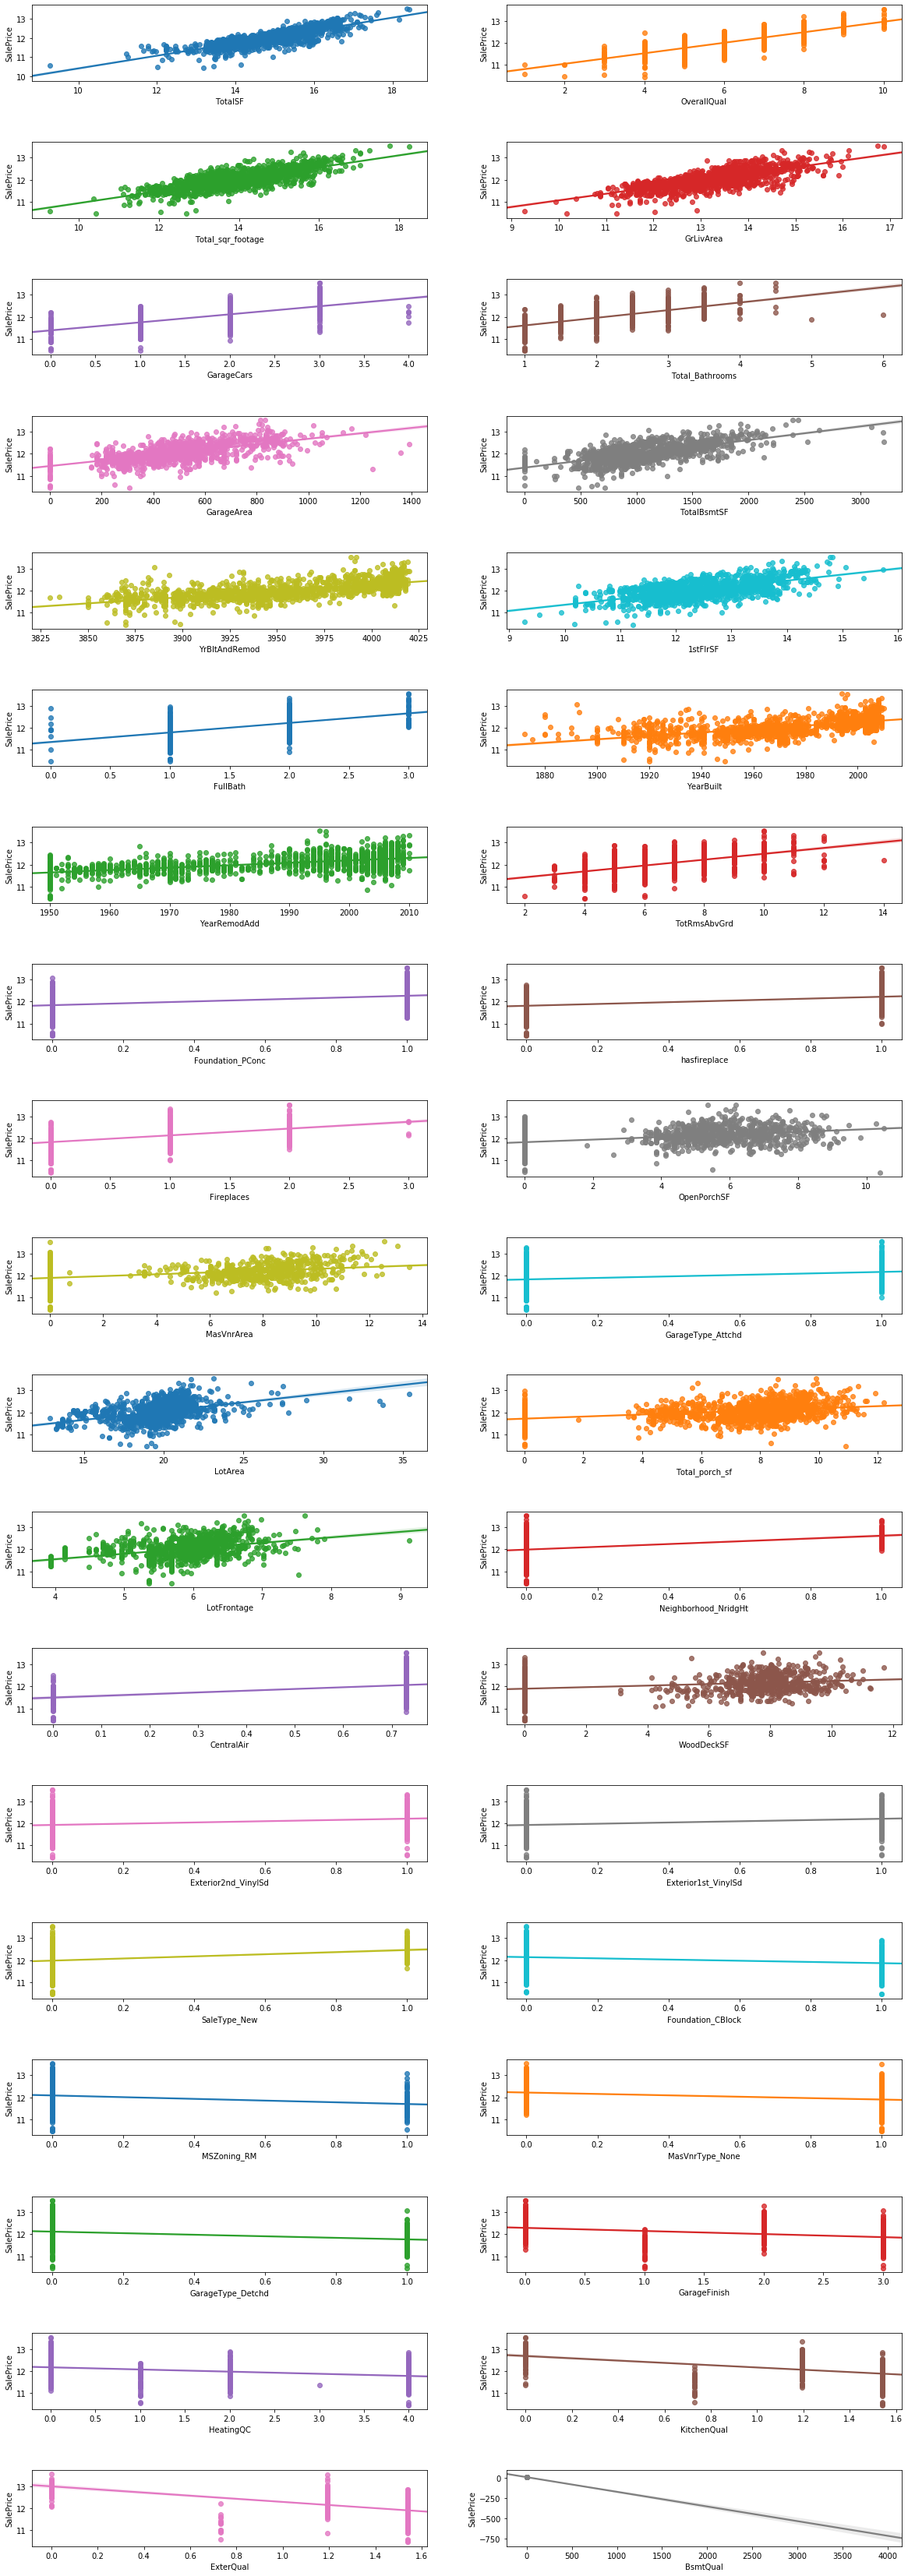

In [70]:
row = 19
col = 2

fig, axs = plt.subplots(row,col, figsize = (20,60))
fig.subplots_adjust(hspace=0.8)

for r in range(0,row):
    for c in range(0,col):
        i = r*col + c
        if i < len(best_columns):
            sns.regplot(final_train[final_num[i]],target,fit_reg=True,marker='o', ax = axs[r][c])

> 상관성이 큰 변수들을 확인하여 regplot을 확인한뒤에 이상치 데이터를 처리하면 모델링 성능을 더 높일수 있을것으로 보입니다

## III. 모델링 <a id="three"></a>

In [71]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression

### a. 단순선형 회귀 <a id="three-a"></a>

In [72]:
from sklearn.preprocessing import RobustScaler

In [73]:
rbst_scaler=RobustScaler()
X_rbst=rbst_scaler.fit_transform(new_train)
test_rbst=rbst_scaler.transform(new_test)

In [74]:
import statsmodels.api as sm

In [75]:
model = sm.OLS(target.values, new_train)

In [76]:
re = model.fit()

In [77]:
re.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     106.1
Date:                Fri, 05 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:09:07   Log-Likelihood:                 1394.4
No. Observations:                1458   AIC:                            -2375.
Df Residuals:                    1251   BIC:                            -1281.
Df Model:                         206                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
MSSubClass               -0.0019      0.003     -0.583      0.560      -0.008       0.005
LotFrontage               0.0085      0.008      1.035      0.301      -0.008       0.025
LotArea                   0.0232      0.003      8.690      0.000       0.018       0.028
Street                    0.1218      0.069      1.764      0.078      -0.014       0.257
Alley                     0.0146      0.013      1.118      0.264      -0.011       0.040
LotShape                  0.0028      0.002      1.209      0.227      -0.002       0.007
LandSlope                 0.0190      0.021      0.892      0.372      -0.023       0.061
OverallQual               0.0421      0.004      9.703      0.000       0.034       0.051
OverallCond               0.0404      0.004     11.266      0.000       0.033       0.047
YearBuilt                 0.0010      0.000      4.097      0.000       0.001       0.001
YearRemodAdd             -0.0002      0.000     -0.784      0.433      -0.001       0.000
MasVnrArea                0.0008      0.003      0.289      0.773      -0.004       0.006
ExterQual                -0.0159      0.014     -1.106      0.269      -0.044       0.012
ExterCond                 0.0181      0.013      1.400      0.162      -0.007       0.043
BsmtQual                 -0.0082      0.004     -2.208      0.027      -0.015      -0.001
BsmtCond                  0.0107      0.008      1.339      0.181      -0.005       0.026
BsmtExposure             -0.0047      0.006     -0.753      0.452      -0.017       0.008
BsmtFinType1             -0.0014      0.002     -0.583      0.560      -0.006       0.003
BsmtFinSF1               -0.0004      0.002     -0.190      0.849      -0.004       0.003
BsmtFinType2             -0.0111      0.013     -0.876      0.381      -0.036       0.014
BsmtFinSF2               -0.0044      0.002     -2.457      0.014      -0.008      -0.001
BsmtUnfSF                -0.0011      0.002     -0.608      0.543      -0.005       0.003
TotalBsmtSF            7.853e-05   3.83e-05      2.050      0.041    3.37e-06       0.000
HeatingQC                -0.0074      0.002     -3.412      0.001      -0.012      -0.003
CentralAir                0.0723      0.023      3.167      0.002       0.028       0.117
1stFlrSF                  0.0251      0.021      1.218      0.223      -0.015       0.066
2ndFlrSF                  0.0331      0.011      3.081      0.002       0.012       0.054
LowQualFinSF              0.0020      0.004      0.509      0.611      -0.006       0.010
GrLivArea                 0.0222      0.030      0.749      0.454      -0.036       0.080
BsmtFullBath              0.5567      0.484      1.150      0.250      -0.393       1.507
BsmtHalfBath              0.3765      0.336      1.121      0.263      -0.283       1.036
FullBath               

모델의 설명력이 1로 굉장히 높지만 변수들중 P-value가 높은 값들이 존재하며 
다중공선성의 문제 있을수도 있음

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = new_train.columns
vif['vif'] = [variance_inflation_factor(
    new_train.values, i) for i in range(new_train.shape[1])]

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [79]:
vif.sort_values(by='vif',ascending=False)[165:190]

,Features,vif
40,GarageYrBlt,41364.319429
61,Total_Bathrooms,20673.122475
31,FullBath,10235.940905
29,BsmtFullBath,9073.928279
63,haspool,3356.316056
52,PoolArea,3094.669903
32,HalfBath,2159.981850
26,2ndFlrSF,535.201449
30,BsmtHalfBath,481.494808
64,has2ndfloor,343.411350


>vif가 10 이상이면 다중공선성이 존재한다고 하는데  많은 변수들이 다중공선성 문제 존재
>
>해결 방안으로는
>
>1.다중공선성에 robust한 트리모델을 사용하는 방법
>
>2.변수제거 및 FE, 변환등을 통한 대체
>
>3.관측값을 늘려 표본의 크기를 증가

>주어진 데이터로 인하여 표본의 크기를 증가할 수 없기 때문에 robust한 트리모델을 사용하는 방법을 택하였습니다.
>
>*Robust : 중앙값(median)과 IQR(interquartile range) 사용. 아웃라이어의 영향을 최소화

### b. RobustScaler <a id="three-b"></a>

In [80]:
from sklearn.preprocessing import RobustScaler
rbst_scaler=RobustScaler()
X_rbst=rbst_scaler.fit_transform(new_train)
test_rbst=rbst_scaler.transform(new_test)

> 데이터에 RobustScaler화 해줍니다

### c. KFold <a id="three-c"></a>

In [81]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold

In [82]:
kfold = KFold(n_splits=4)

In [83]:
random_state = 1
reg = []

reg.append(Lasso(random_state = random_state))
reg.append(ElasticNet(random_state = random_state))
reg.append(RandomForestRegressor(random_state=random_state))
reg.append(GradientBoostingRegressor(random_state=random_state))
reg.append(XGBRegressor(silent=True,random_state=random_state))
reg.append(LGBMRegressor(verbose_eval=False,random_state = random_state))

In [84]:
reg_results = []

for regre in reg :
    reg_results.append(np.mean(np.sqrt(-cross_val_score(regre, X_rbst, y = target,scoring = 'neg_mean_squared_error',
                                       cv = kfold, n_jobs=-4))))

In [85]:
reg_means = []
reg_std = []
for reg_result in reg_results:
    reg_means.append(reg_result.mean())
    reg_std.append(reg_result.std())

In [86]:
reg_re = pd.DataFrame({"CrossValMeans":reg_means,"CrossValerrors": reg_std})
reg_re

,CrossValMeans,CrossValerrors
0,0.378693,0.0
1,0.378227,0.0
2,0.143605,0.0
3,0.121692,0.0
4,0.124463,0.0
5,0.128263,0.0


> CrossValMeans 확인 결과 Gradient boosting, xgboost, lightgbm 모델에 대해서 파라미터 튜닝을 해줍니다

### d. 파라미터 튜닝 & GridSearchCV <a id="three-d"></a>

In [87]:
# Gradient boosting 파라미터 튜닝
GBC = GradientBoostingRegressor()
gb_param_grid = {'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }
gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="neg_mean_squared_error", n_jobs= 4, verbose = 1)
gsGBC.fit(X_rbst,target)
GBC_best = gsGBC.best_estimator_

# 최고 점수
gsGBC.best_score_

Fitting 4 folds for each of 72 candidates, totalling 288 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   31.6s
[Parallel(n_jobs=4)]: Done 288 out of 288 | elapsed:   48.1s finished


-0.017642437944810158

In [88]:
# XGBoost 파라미터 튜닝 
#xgb_param_grid = {'learning_rate': [1,0.1,0.01,0.001],
#              'n_estimators': [50, 100, 200, 500, 1000,3000],
#              'max_depth' : [1,3,5,10,50],
#              'subsample': [0.6, 0.7, 1.0],
#              'colsample_bytree' : [0.3,0.5,0.7,1],
#              'scale_pos_weight' : [0.5,1],
#              'reg_alpha': [0,0.05,0.0005,0.000005]
#               }

In [89]:
# XGBoost 파라미터 튜닝 

XGB = XGBRegressor()
xgb_param_grid = {'learning_rate': [1,0.1,0.01,0.001],
              'n_estimators': [50, 100, 200, 500, 1000],
              'max_depth' : [1,3,5,10,50]}
gsXGB = GridSearchCV(XGB,param_grid = xgb_param_grid, cv=kfold, scoring="neg_mean_squared_error", n_jobs= 4, verbose = 1)
gsXGB.fit(X_rbst,target)
XGB_best = gsXGB.best_estimator_

# 최고 점수
gsXGB.best_score_

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   46.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  4.4min
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed: 10.5min finished


[13:20:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


-0.01401763386474506

In [91]:
#LGBMClassifier 파라미터 튜닝
LGB = LGBMRegressor()
lgb_param_grid = {
    'num_leaves' : [1,5,10],
    'learning_rate': [1,0.1,0.01,0.001],
    'n_estimators': [50, 100, 200, 500, 1000,5000], 
    'max_depth': [15,20,25],
    'num_leaves': [50, 100, 200],
    'min_split_gain': [0.3, 0.4],
}
gsLGB = GridSearchCV(LGB,param_grid = lgb_param_grid, cv=kfold, scoring="neg_mean_squared_error", n_jobs= 4, verbose = 1)
gsLGB.fit(X_rbst,target)
LGB_best = gsLGB.best_estimator_

# 최고 점수
gsLGB.best_score_

Fitting 4 folds for each of 432 candidates, totalling 1728 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 132 tasks      | elapsed:   14.2s
[Parallel(n_jobs=4)]: Done 283 tasks      | elapsed:   38.8s
[Parallel(n_jobs=4)]: Done 533 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 883 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 1333 tasks      | elapsed:  4.2min
[Parallel(n_jobs=4)]: Done 1728 out of 1728 | elapsed:  8.7min finished


-0.018534678272183473

>gridSearchCV는 매개 변수 그리드를 사용하여 알고리즘을 최적화합니다. 이 그리드는 매우 커질 수 있으므로 완료하려면 많은 계산 능력이 필요합니다. 계산 시간을 줄이기 위해 그리드에 일련의 답변을 포함 시켰지만 최종 답변은 아닙니다. 최고의 가치를 찾기 위해 이것을 당신에게 맡기겠습니다. 그러나 실제로는 최상의 조합을 찾으려는 목표로 이러한 그리드를 적절한 값으로 채워야합니다.

## IV. 예측 <a id="four"></a>

>앙상블 기법에는 다양한 방법이 존재하는데
>
>Voting (투표) - 투표를 통해 결과 도출
>
>Bagging - Bootstrap Aggregating (샘플을 다양하게 중복 생성)
>
>Boosting - 이전 오차를 보완하며 가중치 부여
>
>Stacking- 여러 모델을 기반으로 meta 모델

>앙상블 모델을 사용함으로써 성능을 분산시켜 과적합 감소 효과와 개별 모델 성능이 잘 안나올 때 앙상블 학습을 이용하면 성능을 향상시킬수 있다. 앙상블에는 배깅과 부스팅이 스태킹 등 있는데 스태킹은 서로 다른 모델들을 조합해서 최고의 성능을 내는 모델을 생성하는 것이고 위의 5개의 예측값만을 이용해가지고 타겟변수를 예측하는 것이다.average는 모델의 예측값을 평균을 내줌으로서 성능을 향상시키는 것인데 모델의 스코어에 맞추어 가중치를 달리 해주는 방식을 선택하였다.

### a.앙상블 <a id="four-a"></a>

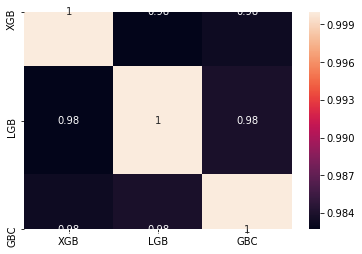

In [92]:
test_Survived_GBC = pd.Series(GBC_best.predict(test_rbst), name="GBC")
test_Survived_XGB = pd.Series(XGB_best.predict(test_rbst), name="XGB")
test_Survived_LGB = pd.Series(LGB_best.predict(test_rbst), name="LGB")

ensemble_results = pd.concat([test_Survived_XGB,test_Survived_LGB,
                              test_Survived_GBC],axis=1)
g= sns.heatmap(ensemble_results.corr(),annot=True)

In [93]:
ensemble = np.expm1(0.1*test_Survived_GBC + 0.8*test_Survived_XGB + 0.1*test_Survived_LGB)
submission = pd.DataFrame({
    "Id" :test['Id'],
    "SalePrice": ensemble
})
submission.head()

,Id,SalePrice
0,1461,123999.177272
1,1462,163583.538442
2,1463,181725.905177
3,1464,197445.199127
4,1465,194347.819076


In [94]:
#submission.to_csv('ensemblesubmission.csv', index=False)

> 3가지 모델을 heatmap을 통해서 상관관계를 비교해보고 상관성이 높은 XGB와 GBC 모델을 이용하여
앙상블 모델을 만들어서 결과를 제출합니다

### b.보팅 <a id="four-b"></a>

In [95]:
from sklearn.ensemble import VotingRegressor

In [96]:
votingC = VotingRegressor(estimators=[('XGB', XGB_best), ('LGB', LGB_best), ('GBC',GBC_best)], n_jobs=4)
votingC = votingC.fit(X_rbst, target)  

In [97]:
test_SalePrice = pd.Series(votingC.predict(test_rbst), name="SalePrice")

In [98]:
submission = pd.DataFrame({
    "Id" :test['Id'],
    "SalePrice": np.expm1(test_SalePrice)
})
submission.head()

,Id,SalePrice
0,1461,125691.628511
1,1462,162461.169781
2,1463,182949.467791
3,1464,193698.298552
4,1465,191056.794209


In [99]:
#submission.to_csv('votingsubmission.csv', index=False)

> 투표는 여러 머신 러닝 모델의 예측을 결합하는 가장 간단한 방법 중 하나입니다. 실제 분류기는 아니지만 각 알고리즘의 다른 특성을 이용하기 위해 병렬로 학습되고 평가되는 다른 세트에 대한 래퍼입니다. 투표를 기반으로 구축하고 예측 한 모델의 예측을 결합합니다.

### c.스태킹 <a id="four-c"></a>

In [100]:
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.utils.testing import ignore_warnings

In [101]:
params = {'meta_regressor__C': [0.1, 1.0, 10.0, 100.0],
          'use_features_in_secondary' : [True, False]}

In [102]:
clf1 = XGB_best
clf2 = LGB_best
clf3 = GBC_best

lr = LogisticRegression()
st_re= StackingRegressor(regressors=[clf1, clf2, clf3], meta_regressor=RandomForestRegressor())
st_mod = st_re.fit(X_rbst, target)
st_pred = st_mod.predict(test_rbst)

[13:32:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [103]:
submission = pd.DataFrame({
    "Id" :test['Id'],
    "SalePrice": np.expm1(st_pred)
})
submission.head()

,Id,SalePrice
0,1461,123025.810533
1,1462,160972.035827
2,1463,188677.844806
3,1464,197484.540964
4,1465,187231.547804


>Boosting, Stacking 및 Voting과 같은 regressor에 앙상블 모델을 적용하여 보스턴 집값 예측을 하였습니다.

### d.blending <a id="four-d"></a>

In [105]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

In [106]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=new_train):
    rmse = np.sqrt(-cross_val_score(model, X_rbst, target,
                                    scoring="neg_mean_squared_error",
                                    cv=kfolds))
    return (rmse)

In [107]:
alphas_ridge = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas_lasso = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_enect = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
enect_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

In [108]:
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor

In [109]:
ridge = make_pipeline(RobustScaler(),
                      RidgeCV(alphas=alphas_ridge, cv=kfolds))

In [110]:
lasso = make_pipeline(RobustScaler(),
                      LassoCV(max_iter=1e7, alphas=alphas_lasso,
                              random_state=2, cv=kfolds))

In [111]:
enet = make_pipeline(RobustScaler(),
                           ElasticNetCV(max_iter=1e7, alphas=alphas_enect,
                                        cv=kfolds, l1_ratio=enect_l1ratio))

In [112]:
svr = make_pipeline(RobustScaler(),
                      SVR(C= 20, epsilon= 0.008, gamma=0.0003,))

In [117]:
stack_gen = StackingCVRegressor(regressors=(ridge, lasso, enet,
                                            GBC_best, XGB_best, LGB_best),
                                meta_regressor=XGB_best,
                                use_features_in_secondary=True)

In [121]:
score = cv_rmse(ridge)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(),score.std()))

score = cv_rmse(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(enet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(svr)
print("SVR score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(GBC_best)
print("Lightgbm score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(XGB_best)
print("GradientBoosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(LGB_best)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()) )

Kernel Ridge score: 0.1096 (0.0162)

Lasso score: 0.1087 (0.0159)

ElasticNet score: 0.1088 (0.0158)

SVR score: 0.1095 (0.0179)

Lightgbm score: 0.1274 (0.0124)

[13:37:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:38:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:38:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:38:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:38:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:38:27] WARNIN

In [123]:
stack_gen_model = stack_gen.fit(np.array(X_rbst), np.array(target))
elastic_model_full_data = enet.fit(X_rbst, target)
lasso_model_full_data = lasso.fit(X_rbst, target)
ridge_model_full_data = ridge.fit(X_rbst, target)
svr_model_full_data = svr.fit(X_rbst, target)
gbr_model_full_data = GBC_best.fit(X_rbst, target)
xgb_model_full_data = XGB_best.fit(X_rbst, target)
lgb_model_full_data = LGB_best.fit(X_rbst, target)

[13:44:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:44:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:44:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:44:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:44:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:45:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:45:17] WARNI

In [126]:
def blend_models_predict(X):
    return ((0.1 * elastic_model_full_data.predict(X)) + \
            (0.1 * lasso_model_full_data.predict(X)) + \
            (0.1 * ridge_model_full_data.predict(X)) + \
            (0.1 * svr_model_full_data.predict(X)) + \
            (0.1 * gbr_model_full_data.predict(X)) + \
            (0.15 * xgb_model_full_data.predict(X)) + \
            (0.1 * lgb_model_full_data.predict(X)) + \
            (0.25 * stack_gen_model.predict(np.array(X))))

In [128]:
pred = np.floor(np.expm1(blend_models_predict(test_rbst)))
submission = pd.DataFrame({
    "Id" :test['Id'],
    "SalePrice": pred
})
submission.head()

,Id,SalePrice
0,1461,121605.0
1,1462,158427.0
2,1463,182175.0
3,1464,195394.0
4,1465,191226.0


In [129]:
submission.to_csv('final_submission.csv', index=False)

> Blending은 다른 앙상블 기술인 스태킹과 비교됩니다. 다른 예측 모형들의 결과값들을 통해 새로운 모델의 방법을 만드는 앙상블 방법입니다. 스태킹의 경우는 train 데이터 셋의 예측값을 train 데이터로 하여 meta regression 학습을 하고 이 meta regression을 통해 test 데이터 셋을 예측합니다. 
>
>Blending과 Stacking의 차이는
>
>1.Blending은 검증 데이터 셋에 대한 예측값을 train 데이터에 이용하지만 Stacking은 train 데이터 셋에 대한 예측값을 활용합니다.
>
>2.Blending은 예측값 뿐 아니라 원래 피처도 활용하는 반면 Stacking은 예측값만 활용합니다.